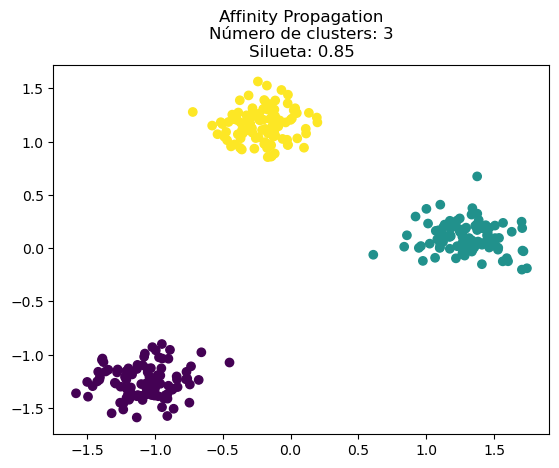

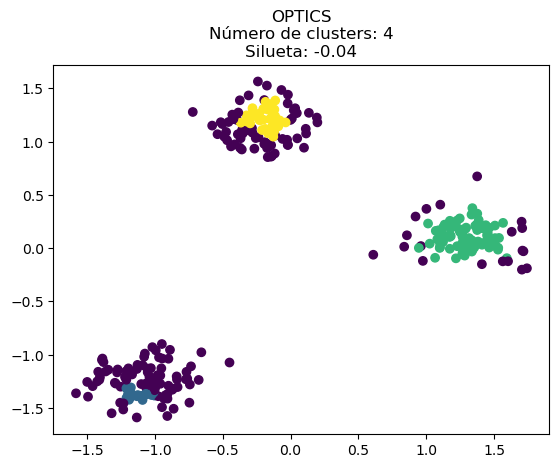

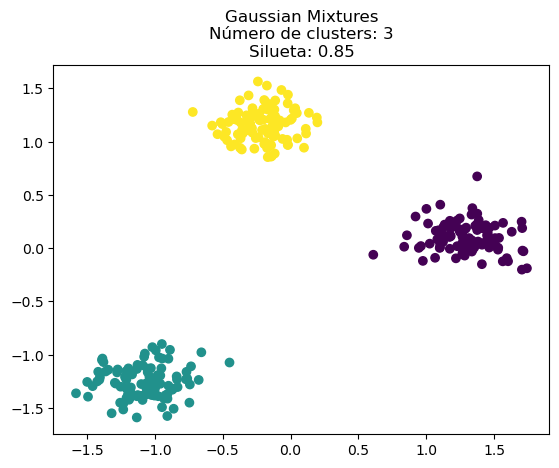

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import AffinityPropagation, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Crear conjuntos de datos de ejemplo (sustituir por los conjuntos reales)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
# Otra opción: X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# Otra opción: X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para aplicar un algoritmo de agrupamiento y visualizar los resultados
def cluster_and_visualize(model, X, title):
    y_pred = model.fit_predict(X)
    
    # Calcular la puntuación de silueta para evaluar la calidad del agrupamiento
    silhouette_avg = silhouette_score(X, y_pred)
    
    # Visualizar los resultados
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.title(f"{title}\nNúmero de clusters: {len(np.unique(y_pred))}\nSilueta: {silhouette_avg:.2f}")
    plt.show()

# Affinity Propagation
affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
cluster_and_visualize(affinity_propagation, X_scaled, "Affinity Propagation")

# OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
cluster_and_visualize(optics, X_scaled, "OPTICS")

# Gaussian Mixtures
gaussian_mixtures = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
cluster_and_visualize(gaussian_mixtures, X_scaled, "Gaussian Mixtures")